In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [3]:
X

array([[ 3.2447351 , -7.1762088 ],
       [ 2.43403092, -7.19798304],
       [ 3.40398668, -7.6984055 ],
       ...,
       [11.56191846, -0.75024717],
       [ 2.68038022, -6.9868132 ],
       [ 7.35067571, -1.74365646]], shape=(1000, 2))

In [4]:
y

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0,
       0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2,
       0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0,
       2, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0,
       2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 1, 2,
       1, 0, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2,
       2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1, 1,
       1, 0, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2,
       2, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2,
       0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1,
       1, 1, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 2, 1,

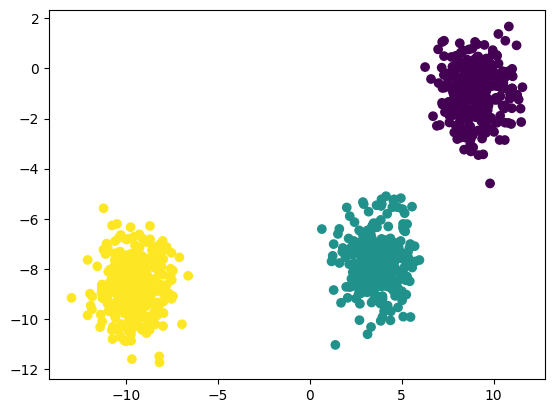

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)


In [6]:
# standardization -- feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [10]:
wcss

[1340.0000000000002,
 388.41614743846196,
 65.55203204319822,
 54.70980220249365,
 43.14488329492645,
 31.542247003203165,
 28.127160414817695,
 26.96450127240324,
 24.131739858104428,
 20.545054850622076]

Text(0, 0.5, 'WCSS')

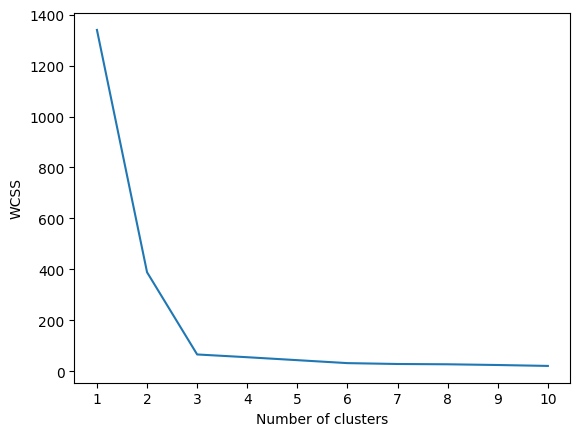

In [11]:
# plot elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit_predict(X_train_scaled)

array([0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 1,
       0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 1, 1,
       0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0,
       2, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 0, 2,
       1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0,
       1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0,
       2, 2, 1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 2,
       2, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0, 1,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0,

In [13]:
y_pred = kmeans.predict(X_test_scaled)

In [14]:
y_pred

array([2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2,
       1, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2,
       1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2,
       2, 1, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 1, 0,
       1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 0,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 1, 1,

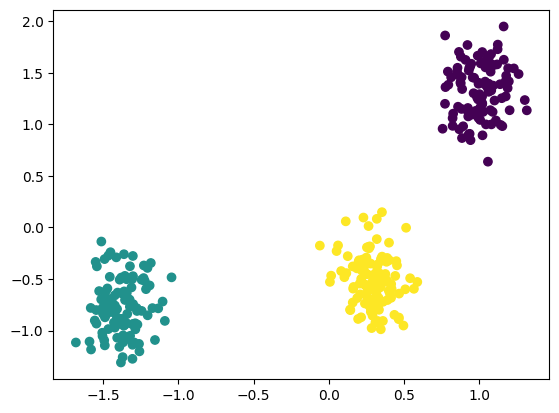

In [15]:
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred)

In [16]:
# Validating the k value
# kneelocator
# Silhouette score

In [17]:
# kneelocator
from kneed import KneeLocator

In [18]:
kl=KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")

In [19]:
kl.elbow

np.int64(3)

In [20]:
# silhouette score
from sklearn.metrics import silhouette_score


In [21]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [22]:
silhouette_coefficients

[0.6563679807766097,
 0.7867395174828873,
 0.6704234752102758,
 0.531210876099133,
 0.5304070502027023,
 0.4968902440676091,
 0.3992674663358279,
 0.3846375741036361,
 0.3482987594350943]

Text(0, 0.5, 'Silhouette Coefficient')

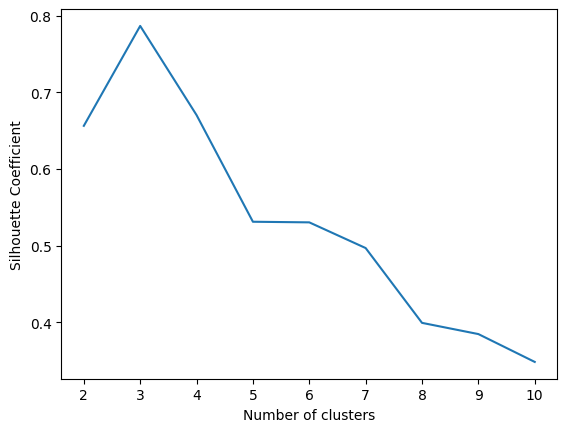

In [23]:
# plot elbow curve
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')